In [20]:
import pandas as pd
import numpy as np 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
import os
import random 
import seaborn as sns
import functools
from fbprophet import Prophet

In [21]:
data = pd.read_csv(os.path.expanduser("~/Desktop/DS_Competition/ucsbdata.csv")).dropna(axis=0)
data = data.drop(['OPEN', 'HIGH', 'LOW'], axis=1)
data = data[2:]
data['Index']=pd.to_datetime(data['Index'])
data.head(5)




#data.fillna(method='ffill')
#data.fillna(0, inplace=True)
#data.head(10)

,Index,R,US10YR,EPS,PER,CLOSE,BDIY,VIX,PCR,MVOLE,...,MYSTERYVAR3,TOM,HULBERTSENTIMENT,BUBBLE,CASH,DEBT,DIVIDEND,RETURN,STOCKS,WAR
13845,2007-01-05,0.004424,4.6442,81.13,17.375940,1409.71,4539.0,12.14,0.59,12341.53,...,12.111332,0,62.0,73.023286,89.157102,64.732561,50.162432,27.507040,55.280828,52.176469
13846,2007-01-08,-0.001042,4.6522,81.12,17.416667,1412.84,4579.0,12.00,0.71,11162.97,...,12.133530,0,62.0,72.009073,91.305466,63.952651,37.927693,27.231969,58.494830,53.859581
13847,2007-01-09,0.003134,4.6542,81.12,17.407668,1412.11,4617.0,11.91,0.67,12180.91,...,12.148388,0,62.0,65.923800,85.934556,64.732561,47.103747,25.306476,51.424026,53.859581
13848,2007-01-10,0.004179,4.6843,81.09,17.447897,1414.85,4640.0,11.47,0.58,12246.15,...,12.142451,0,52.0,70.994861,88.082920,64.732561,46.492010,24.756336,57.209229,58.908917
13849,2007-01-11,0.007376,4.7305,81.08,17.560681,1423.82,4647.0,10.87,0.54,13531.26,...,12.132268,0,52.0,74.037498,85.934556,64.732561,46.492010,26.956899,64.280033,58.908917


AttributeError: 'numpy.str_' object has no attribute 'toordinal'

<Figure size 1440x1152 with 0 Axes>

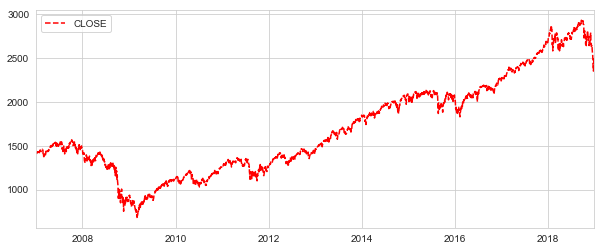

In [22]:
fig=plt.figure(figsize=(20, 16))
data.plot(x='Index', y='CLOSE',xlim=['2007-01-01','2017-12-31'],legend=True,figsize=(10,4),ls='--',c='red')

plt.ioff()

In [ ]:
data['CLOSE_10']=data['CLOSE'].rolling(10).mean()
data['CLOSE_50']=data['CLOSE'].rolling(50).mean()
fig=plt.figure(figsize=(20, 10))

ax=data.plot(x='Index',y='CLOSE',title='S&P Close Price',figsize=(10,4))
data.plot(x='Index',y='CLOSE_10',color='red',ax=ax)
data.plot(x='Index',y='CLOSE_50',color='k',ax=ax)
plt.ioff()

In [ ]:
data['Daily Return']=data['CLOSE'].pct_change()
data['Daily Return'].plot(figsize=(15,4),legend=True,linestyle='--',marker='o')
plt.ioff()

In [ ]:
data['Daily Return'].hist(bins=100)
plt.ioff()

In [28]:
df=data['Index'].copy()
df=pd.DataFrame(df)
df['S&P']=data['CLOSE']
df.drop(['Index'], axis = 1, inplace = True, errors = 'ignore')
tech_rets=df.pct_change()
tech_rets=pd.DataFrame(tech_rets)
tech_rets['Index']=data['Index']
tech_rets.shape
tech_rets.head(3)

,S&P,Index
13845,NaN,2007-01-05
13846,0.002220,2007-01-08
13847,-0.000517,2007-01-09


In [29]:
rets=tech_rets.dropna()

In [30]:
rets['S&P'].quantile(0.05)
# 95% of the time, the worst daily losses will not exceed 1.44%

-0.01957895120378135

# Montle Carlo Simulation for Risk Analysis


In [31]:
days=365
dt=1/365
mu=rets.mean()['S&P']
sigma=rets.std()['S&P']

def stock_monte_carlo(start_price,days,mu,sigma):
    price=np.zeros(days)
    price[0]=start_price
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
        price[x]=price[x-1] + (price[x-1]*(drift[x]+shock[x]))
        
    return price


data.head(5)

,Index,R,US10YR,EPS,PER,CLOSE,BDIY,VIX,PCR,MVOLE,...,MYSTERYVAR3,TOM,HULBERTSENTIMENT,BUBBLE,CASH,DEBT,DIVIDEND,RETURN,STOCKS,WAR
13845,2007-01-05,0.004424,4.6442,81.13,17.375940,1409.71,4539.0,12.14,0.59,12341.53,...,12.111332,0,62.0,73.023286,89.157102,64.732561,50.162432,27.507040,55.280828,52.176469
13846,2007-01-08,-0.001042,4.6522,81.12,17.416667,1412.84,4579.0,12.00,0.71,11162.97,...,12.133530,0,62.0,72.009073,91.305466,63.952651,37.927693,27.231969,58.494830,53.859581
13847,2007-01-09,0.003134,4.6542,81.12,17.407668,1412.11,4617.0,11.91,0.67,12180.91,...,12.148388,0,62.0,65.923800,85.934556,64.732561,47.103747,25.306476,51.424026,53.859581
13848,2007-01-10,0.004179,4.6843,81.09,17.447897,1414.85,4640.0,11.47,0.58,12246.15,...,12.142451,0,52.0,70.994861,88.082920,64.732561,46.492010,24.756336,57.209229,58.908917
13849,2007-01-11,0.007376,4.7305,81.08,17.560681,1423.82,4647.0,10.87,0.54,13531.26,...,12.132268,0,52.0,74.037498,85.934556,64.732561,46.492010,26.956899,64.280033,58.908917


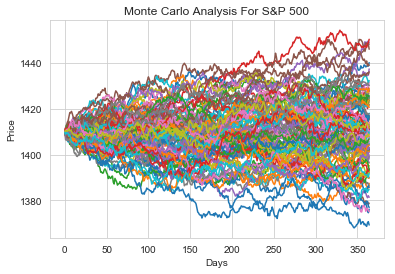

In [32]:
start_price=1409.71
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis For S&P 500')
plt.ioff()

In [33]:
runs=10000

simulations=np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

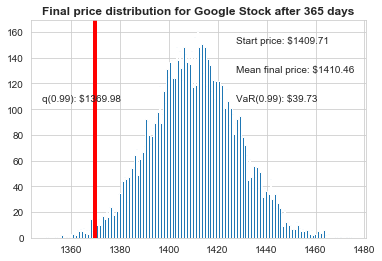

In [34]:
q=np.percentile(simulations,1)

plt.hist(simulations,bins=200)


# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

In [35]:
data.head(5)

,Index,R,US10YR,EPS,PER,CLOSE,BDIY,VIX,PCR,MVOLE,...,MYSTERYVAR3,TOM,HULBERTSENTIMENT,BUBBLE,CASH,DEBT,DIVIDEND,RETURN,STOCKS,WAR
13845,2007-01-05,0.004424,4.6442,81.13,17.375940,1409.71,4539.0,12.14,0.59,12341.53,...,12.111332,0,62.0,73.023286,89.157102,64.732561,50.162432,27.507040,55.280828,52.176469
13846,2007-01-08,-0.001042,4.6522,81.12,17.416667,1412.84,4579.0,12.00,0.71,11162.97,...,12.133530,0,62.0,72.009073,91.305466,63.952651,37.927693,27.231969,58.494830,53.859581
13847,2007-01-09,0.003134,4.6542,81.12,17.407668,1412.11,4617.0,11.91,0.67,12180.91,...,12.148388,0,62.0,65.923800,85.934556,64.732561,47.103747,25.306476,51.424026,53.859581
13848,2007-01-10,0.004179,4.6843,81.09,17.447897,1414.85,4640.0,11.47,0.58,12246.15,...,12.142451,0,52.0,70.994861,88.082920,64.732561,46.492010,24.756336,57.209229,58.908917
13849,2007-01-11,0.007376,4.7305,81.08,17.560681,1423.82,4647.0,10.87,0.54,13531.26,...,12.132268,0,52.0,74.037498,85.934556,64.732561,46.492010,26.956899,64.280033,58.908917


In [ ]:
df_prophet=data[['Index','CLOSE']]
df_prophet=df_prophet.sort_values('Index')
df_prophet.head(5)

,Index,CLOSE
13845,2007-01-05,1409.71
13846,2007-01-08,1412.84
13847,2007-01-09,1412.11
13848,2007-01-10,1414.85
13849,2007-01-11,1423.82


In [ ]:
df_prophet=df_prophet.rename(columns={'Index':'ds','CLOSE':'y'})

df_prophet.head(3)

,ds,y
13845,2007-01-05,1409.71
13846,2007-01-08,1412.84
13847,2007-01-09,1412.11


In [ ]:
m=Prophet()
m.fit(df_prophet)
future=m.make_future_dataframe(periods=365)

future.tail()
forecast=m.predict(future)
forecast.describe().T

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,count,mean,std,min,25%,50%,75%,max
trend,3378.0,1839.093824,663.923004,817.186574,1286.121325,1715.374532,2302.696638,3206.799900
yhat_lower,3378.0,1763.825287,649.461322,767.718126,1224.779010,1636.365963,2227.890379,2975.871310
yhat_upper,3378.0,1922.330302,677.256923,907.027218,1367.777526,1781.461146,2372.008411,3496.469415
trend_lower,3378.0,1827.704582,642.958333,817.186574,1286.121325,1715.374532,2302.696638,2969.604936
trend_upper,3378.0,1850.549797,687.197225,817.186574,1286.121325,1715.374532,2302.696638,3486.440765
additive_terms,3378.0,3.944919,17.615403,-40.101274,-11.029463,3.908276,16.680415,40.516661
additive_terms_lower,3378.0,3.944919,17.615403,-40.101274,-11.029463,3.908276,16.680415,40.516661
additive_terms_upper,3378.0,3.944919,17.615403,-40.101274,-11.029463,3.908276,16.680415,40.516661
weekly,3378.0,3.810466,2.708780,-10.608305,3.985614,4.625381,4.701472,5.235378
weekly_lower,3378.0,3.810466,2.708780,-10.608305,3.985614,4.625381,4.701472,5.235378


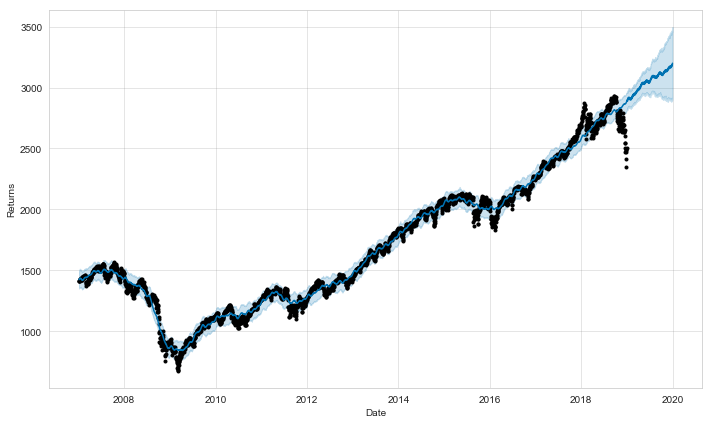

In [ ]:
figure=m.plot(forecast,xlabel='Date',ylabel='Returns')

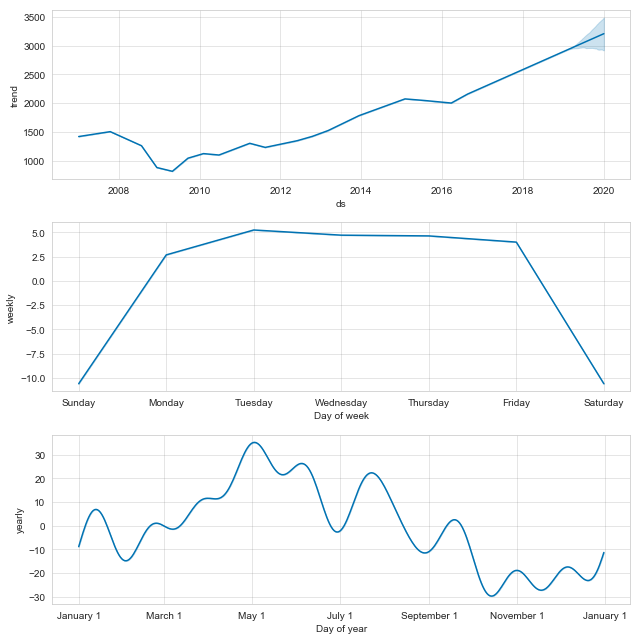

In [ ]:
figure=m.plot_components(forecast)

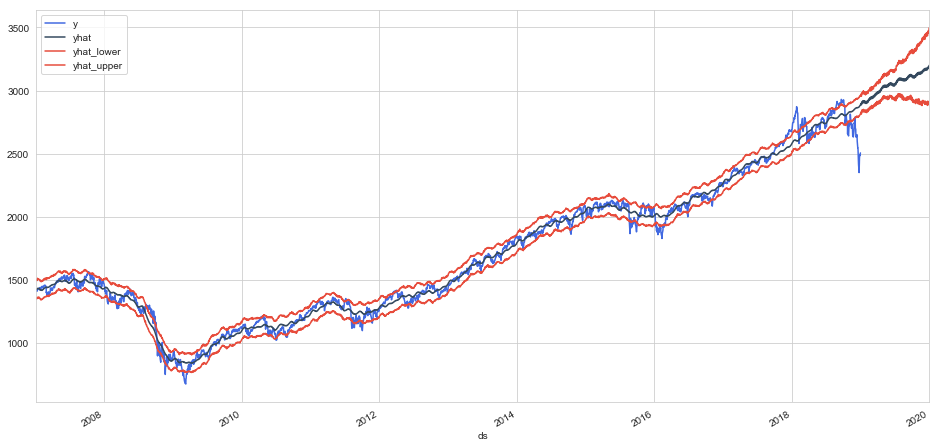

In [ ]:
stock_price_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
stock_price = df_prophet
df = pd.merge(stock_price, stock_price_forecast, on='ds', how='right')
df.set_index('ds').plot(figsize=(16,8), color=['royalblue', "#34495e", "#e74c3c", "#e74c3c"], grid=True);

# Stock Trading Simulation

In [ ]:
stock_price['dayname'] = stock_price['ds'].dt.day_name()
stock_price['month'] = stock_price['ds'].dt.month
stock_price['year'] = stock_price['ds'].dt.year
stock_price['month/year'] = stock_price['month'].map(str) + '/' + stock_price['year'].map(str) 

stock_price = pd.merge(stock_price, 
                       stock_price['month/year'].drop_duplicates().reset_index(drop=True).reset_index(),
                       on='month/year',
                       how='left')

stock_price = stock_price.rename(columns={'index':'month/year_index'})

In [ ]:
stock_price.tail()

,ds,y,dayname,month,year,month/year,month/year_index
3008,2018-12-24,2351.10,Monday,12,2018,12/2018,143
3009,2018-12-26,2467.70,Wednesday,12,2018,12/2018,143
3010,2018-12-27,2488.83,Thursday,12,2018,12/2018,143
3011,2018-12-28,2485.74,Friday,12,2018,12/2018,143
3012,2018-12-31,2506.85,Monday,12,2018,12/2018,143


### Looping through each unique month/year in this dataframe, and fitting the Prophet model with available stock data to that period, then forecasting out one month ahead. Stops until hits last unique month/year. 

### Combines the forecasts into a single dataframe called "stock_price_forecasts"

In [ ]:
loop_list = stock_price['month/year'].unique().tolist()
max_num = len(loop_list) - 1
forecast_frames = []

for num, item in enumerate(loop_list):

    if  num == max_num:
        pass
    else:
        df = stock_price.set_index('ds')[
             stock_price[stock_price['month/year'] == loop_list[0]]['ds'].min():\
             stock_price[stock_price['month/year'] == item]['ds'].max()]
        
        df = df.reset_index()[['ds', 'y']]
        
        model = Prophet()
        model.fit(df)
        
        future = stock_price[stock_price['month/year_index'] == (num + 1)][['ds']]

        forecast = model.predict(future)
        forecast_frames.append(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 13.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override th

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [ ]:
stock_price_forecast = functools.reduce(lambda top, bottom: pd.concat([top, bottom], sort=False), forecast_frames)
stock_price_forecast = stock_price_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
stock_price_forecast.to_csv('stock_price_forecast.csv', index=False)

In [ ]:
stock_price_forecast = pd.read_csv(os.path.expanduser("~/Desktop/DS_Competition/stock_price_forecast.csv"), parse_dates=['ds'])
stock_price_forecast.head(5)

In [ ]:
df = pd.merge(stock_price[['ds','y', 'month/year_index']], stock_price_forecast, on='ds')
df['Percent Change'] = df['y'].pct_change()
df.set_index('ds')[['y', 'yhat', 'yhat_lower', 'yhat_upper']].plot(figsize=(16,8), color=['royalblue', "#34495e", "#e74c3c", "#e74c3c"], grid=True)

# Some Simple Trading Algorithsm
### Hold: Our benchmark. Buy and hold until end of time period
### Prophet: Sell when forecast indicates downtrend
### Prophet Thresh: Sell only when stock price falls below y_hat lower boundary
### Seasonaility: Exit the market in August and re-enter in October.

In [ ]:
df['Hold'] = (df['Percent Change'] + 1).cumprod()
df['Prophet'] = ((df['yhat'].shift(-1) > df['yhat']).shift(1) * (df['Percent Change']) + 1).cumprod()
df['Prophet Thresh']  = ((df['y'] > df['yhat_lower']).shift(1)* (df['Percent Change']) + 1).cumprod()
df['Seasonality'] = ((~df['ds'].dt.month.isin([8,9])).shift(1) * (df['Percent Change']) + 1).cumprod()
(df.dropna().set_index('ds')[['Hold', 'Prophet', 'Prophet Thresh','Seasonality']] * 1000).plot(figsize=(16,8), grid=True)

print(f"Hold = {df['Hold'].iloc[-1]*1000:,.0f}")
print(f"Prophet = {df['Prophet'].iloc[-1]*1000:,.0f}")
print(f"Prophet Thresh = {df['Prophet Thresh'].iloc[-1]*1000:,.0f}")
print(f"Seasonality = {df['Seasonality'].iloc[-1]*1000:,.0f}")
print(f"Optimized Prophet Thresh = {df['Optimized Prophet Thresh'].iloc[-1]*1000:,.0f}")


# Optimize Prophet Thresh's threshold

In [ ]:
performance = {}

for x in np.linspace(.9,.99,10):
    y = ((df['y'] > df['yhat_lower']*x).shift(1)* (df['Percent Change']) + 1).cumprod()
    performance[x] = y
    
best_yhat = pd.DataFrame(performance).max().idxmax()
pd.DataFrame(performance).plot(figsize=(16,8), grid=True);
f'Best Yhat = {best_yhat:,.2f}'

In [ ]:
df['Optimized Prophet Thresh']  = ((df['y'] > df['yhat_lower'] * best_yhat).shift(1) * 
                                   (df['Percent Change']) + 1).cumprod()


(df.dropna().set_index('ds')[['Hold', 'Prophet', 'Prophet Thresh',
                              'Seasonality', 'Optimized Prophet Thresh']] * 1000).plot(figsize=(16,8), grid=True)

print(f"Hold = {df['Hold'].iloc[-1]*1000:,.0f}")
print(f"Prophet = {df['Prophet'].iloc[-1]*1000:,.0f}")
print(f"Prophet Thresh = {df['Prophet Thresh'].iloc[-1]*1000:,.0f}")
print(f"Seasonality = {df['Seasonality'].iloc[-1]*1000:,.0f}")
print(f"Optimized Prophet Thresh = {df['Optimized Prophet Thresh'].iloc[-1]*1000:,.0f}")

In [ ]:
fcst_thresh = {}

for num, index in enumerate(df['month/year_index'].unique()):

    temp_df = df.set_index('ds')[
         df[df['month/year_index'] == df['month/year_index'].unique()[0]]['ds'].min():\
         df[df['month/year_index'] == index]['ds'].max()]

    performance = {}
    
    for thresh in np.linspace(0, .99, 100):
        percent =  ((temp_df['y'] > temp_df['yhat_lower'] * thresh).shift(1)* (temp_df['Percent Change']) + 1).cumprod()
        performance[thresh] = percent
    
    best_thresh = pd.DataFrame(performance).max().idxmax()
    
    if num == len(df['month/year_index'].unique())-1:
        pass
    else:
        fcst_thresh[df['month/year_index'].unique()[num+1]] = best_thresh

In [ ]:
fcst_thresh = pd.DataFrame([fcst_thresh]).T.reset_index().rename(columns={'index':'month/year_index', 0:'Fcst Thresh'})
fcst_thresh['Fcst Thresh'].plot(figsize=(16,8), grid=True);

In [ ]:
df['yhat_optimized'] = pd.merge(df, fcst_thresh, 
                                on='month/year_index', 
                                how='left')['Fcst Thresh'].shift(1) * df['yhat_lower']
df['Prophet Fcst Thresh']  = ((df['y'] > df['yhat_optimized']).shift(1)* (df['Percent Change']) + 1).cumprod()


In [ ]:
(df.dropna().set_index('ds')[['Hold', 'Prophet', 'Prophet Thresh',
                              'Prophet Fcst Thresh']] * 1000).plot(figsize=(16,8), grid=True)

print(f"Hold = {df['Hold'].iloc[-1]*1000:,.0f}")
print(f"Prophet = {df['Prophet'].iloc[-1]*1000:,.0f}")
print(f"Prophet Thresh = {df['Prophet Thresh'].iloc[-1]*1000:,.0f}")
# print(f"Seasonality = {df['Seasonality'].iloc[-1]*1000:,.0f}")
print(f"Prophet Fcst Thresh = {df['Prophet Fcst Thresh'].iloc[-1]*1000:,.0f}")


In [ ]:
rolling_thresh = {}

for num, index in enumerate(df['month/year_index'].unique()):
  
    rolling_performance = {}
    
    for roll in range(10, 400, 10):
            
        temp_df = df.set_index('ds')[
             df[df['month/year_index'] == index]['ds'].min() - pd.DateOffset(months=roll):\
             df[df['month/year_index'] == index]['ds'].max()]

        performance = {}
        
        for thresh in np.linspace(.0,.99, 100):
            percent =  ((temp_df['y'] > temp_df['yhat_lower'] * thresh).shift(1)* (temp_df['Percent Change']) + 1).cumprod()
            performance[thresh] = percent

        per_df =  pd.DataFrame(performance)
        best_thresh = per_df.iloc[[-1]].max().idxmax()
        percents = per_df[best_thresh]
        
        rolling_performance[best_thresh] = percents
    
    per_df =  pd.DataFrame(rolling_performance)
    best_rolling_thresh = per_df.iloc[[-1]].max().idxmax()
    
    if num == len(df['month/year_index'].unique())-1:
        pass
    else:
        rolling_thresh[df['month/year_index'].unique()[num+1]] = best_rolling_thresh

In [ ]:
rolling_thresh = pd.DataFrame([rolling_thresh]).T.reset_index().rename(columns={'index':'month/year_index', 0:'Fcst Thresh'})
rolling_thresh['Fcst Thresh'].plot(figsize=(16,8), grid=True);

### We are trying out various moving windows along with various threshold percents


In [ ]:
df['yhat_optimized'] = pd.merge(df, rolling_thresh, 
                                on='month/year_index', 
                                how='left')['Fcst Thresh'].fillna(1).shift(1) * df['yhat_lower']
df['Prophet Rolling Thresh']  = ((df['y'] > df['yhat_optimized']).shift(1)* (df['Percent Change']) + 1).cumprod()

(df.dropna().set_index('ds')[['Hold', 'Prophet', 'Prophet Thresh',
                              'Prophet Fcst Thresh', 'Prophet Rolling Thresh']] * 1000).plot(figsize=(16,8), grid=True)

print(f"Hold = {df['Hold'].iloc[-1]*1000:,.0f}")
print(f"Prophet = {df['Prophet'].iloc[-1]*1000:,.0f}")
print(f"Prophet Thresh = {df['Prophet Thresh'].iloc[-1]*1000:,.0f}")
# print(f"Seasonality = {df['Seasonality'].iloc[-1]*1000:,.0f}")
print(f"Prophet Fcst Thresh = {df['Prophet Fcst Thresh'].iloc[-1]*1000:,.0f}")
print(f"Prophet Rolling Thresh = {df['Prophet Rolling Thresh'].iloc[-1]*1000:,.0f}")